# HSE 2023: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make conclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task.
Loops are only allowed in part 1 (Tasks 1 - 4).
* Some tasks contain tests. They only test your solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points)

**Task 1** (0.5 points)<br/>
Enter nonzero numbers `a`, `d` and `N`. Find the sum of the first `N` members of [harmonic sequence](https://en.wikipedia.org/wiki/Harmonic_progression_(mathematics)) with the first member denominator `a`

In [3]:
def find_sum(a: int, d: int, N: int) -> float:    
    return np.sum(1.0 / np.arange(1, N+1))

a = 1
d = 1
N = 10
print(find_sum(a, d, N))

2.9289682539682538


**Task 2** (0.5 points) <br/>
Enter an integer number `N`. Check if it is a palindrome number **without converting it to the string**. It means that it can be read equally from left to right and from right to back.

In [10]:
def check_palindrome(N):
    rev = 0
    temp = N
    while temp != 0:
        rev = rev * 10 + temp % 10
        temp = temp // 10
    return np.equal(N, rev)

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/>
Find the first `N` palindrome numbers starting from 42 (you may use the function from the precious task).

In [23]:
def find_palindromes(N):
    curr = 42
    res = []
    while N != 0:
        if check_palindrome(curr):
            N -= 1
            res.append(curr)
        curr += 1
    return res

print(find_palindromes(3))
print(find_palindromes(13))
print(find_palindromes(23))

[44, 55, 66]
[44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161]
[44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 202, 212, 222, 232, 242, 252, 262]


**Task 4** (0.5 points) <br/>
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the median number.

In [24]:
from random import randint

def find_median(a, b, c):
    if a >= b and b >= c or c >= b and b >= a:
        return b
    elif a >= c and c >= b or b >= c and c >= a:
        return c
    return a

for i in range(10):

    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)

    print(a, b, c, '\tMedian:', find_median(a, b, c))

50 53 4 	Median: 50
60 -83 49 	Median: 49
88 51 93 	Median: 88
91 -59 75 	Median: 75
-64 22 50 	Median: 22
-57 -45 1 	Median: -45
-14 -61 -67 	Median: -61
-99 -78 78 	Median: -78
75 39 88 	Median: 75
-47 93 -8 	Median: -8


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array from Gaussian distribution with length of 12 and with sum of its elements equal to 15. Distribution shall be left Gaussian

In [30]:
my_array = np.random.standard_normal(12)
my_array = my_array.dot(15 / my_array.sum())

print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 12
Sum of elements: 14.999999999999943


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length.

Calculate the following distances between the arrays **without using any special function. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [42]:
def calculate_manhattan(a, b):
    return np.sum(np.abs(a - b))

def calculate_euclidean(a, b):
    return np.sqrt(np.sum(np.square(a - b)))

def calculate_chebyshev(a, b):
    return np.max(abs(a - b))

def calculate_cosine(a, b):
    return 1 - np.dot(a, b) / (np.sqrt(np.dot(a, a)) * np.sqrt(np.dot(b, b)))

In [44]:
np.random.seed(2023)

length = np.random.randint(0, 100)
a = np.random.randint(0, 100, length)
b = np.random.randint(0, 100, length)

print('a:\n', a)
print('b:\n', b)
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

a:
 [25 70 55 33 92  3 52 86 96 22 17 53 47 77 39 69 88  3 58 28 81 71 63 48
 32 29 49 49 49 49 53 38 70 15 88 72 47 65 71 22 53  7 45 25 34 49 77 91
 87 45 34 34 11  1 31 69 51 19 40 69 31 43  5 10  7 83 55  6 99 28 46 78
 70 37 63 25 36 40 85 82  5 93 79 26 97 66 58]
b:
 [72 60 26 86 54 24 52 89 79 67 71 78 40 71 36 90 94 47 56 77 15 79  0 95
 39 79 97 72  1 44 27 74 42 56  0  6 62  5 37 77 75 95 20 67 20 12 44 57
 70 47 19 97 18  3 89 10 85 14 87 58 29 77 98 48  3 87 90 70 45 35 19 11
 45 60 64 29 44 41 27 94 36 84  5  7 35 88 47]
Manhattan distance: 2698
Euclidean distance: 362.8443192334696
Chebyshev distance: 93
Cosine distance: 0.2258718653319517


**Task 3** (0.5 points) <br/>
Create a random array of integers with length of 42. Transform the array so that
* Maximum element(s) value is 10
* Minimum element(s) value is -6
* Other values are in interval (-6; 10) without changing the relative order (relation $\frac{x_i}{x_{i-1}}=\frac{\widehat{x}_{i}}{\widehat{x}_{i-1}}$ holds)

In [55]:
def transform(array):
    ini_min, ini_max = np.min(array), np.max(array)
    new_min, new_max = -6.0, 10.0
    
    return (new_max-new_min)*((array-ini_min)/(ini_max-ini_min))+new_min

In [56]:
my_array = np.random.randint(-100, 100, 42)
copy = np.copy(my_array)
input_start = copy.min()
input_end = copy.max()
print('Array before transformation:\n', my_array)
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array after transformation:\n', my_array)

Array before transformation:
 [ 88 -58 -83  91 -51  79 -82  -4 -32 -87  84 -37  -6 -29 -82  91  -6 -76
 -70 -77  -6 -33  10  40 -25 -40 -40 -81  62  53  40  57  -9 -82 -64 -26
   6  82  53 -86 -13  33]
Min: -6.0
Max: 10.0
Array after transformation:
 [ 9.73033708 -3.39325843 -5.64044944 10.         -2.76404494  8.92134831
 -5.5505618   1.46067416 -1.05617978 -6.          9.37078652 -1.50561798
  1.28089888 -0.78651685 -5.5505618  10.          1.28089888 -5.01123596
 -4.47191011 -5.1011236   1.28089888 -1.14606742  2.71910112  5.41573034
 -0.42696629 -1.7752809  -1.7752809  -5.46067416  7.39325843  6.58426966
  5.41573034  6.94382022  1.01123596 -5.5505618  -3.93258427 -0.51685393
  2.35955056  9.19101124  6.58426966 -5.91011236  0.65168539  4.78651685]


**Task 4** (0.5 points) <br/>
Create an array with shape of $10 \times 3$ with integers from [-12, 4]. Find a column that contains the minimum element of the array.

In [106]:
my_array = np.random.randint(-12, 5, 30).reshape((10, 3))
selected_column = -1
min = 10
column_mins = np.argmin(my_array, axis=0)
for i in range(len(column_mins)):
    cur_min = my_array[column_mins[i]][i]
    print(f'Column №{i} minimum={cur_min} on index={column_mins[i]}')
    if cur_min < min:
        min = cur_min
        selected_column = i
print('Array\'s minimum value: ', min)

print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

Column №0 minimum=-10 on index=4
Column №1 minimum=-11 on index=7
Column №2 minimum=-12 on index=0
Array's minimum value:  -12
Shape:  (10, 3)
Array:
[[  4  -7 -12]
 [  4 -10  -3]
 [ -6  -5  -4]
 [  1 -10  -2]
 [-10 -10   0]
 [ -9   2 -10]
 [  4  -9  -2]
 [  4 -11   2]
 [  4 -11   1]
 [ -5   0   3]]
Selected column: 2


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with the most appropriate quantile, explain why you chose it.

In [4]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[0.38805528        nan        nan        nan 0.92541921 0.69329743
 0.225531   0.29300583        nan 0.48978769]


In [7]:
def replace_missing(arr):
    quantile = np.nanquantile(arr, 0.5)
    arr[np.isnan(arr)] = quantile
    return arr

In [6]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.38805528 0.43892148 0.43892148 0.43892148 0.92541921 0.69329743
 0.225531   0.29300583 0.43892148 0.48978769]


**Answer:** Мы используем функцию nanquantile, чтобы найти наиболее подходящий квантиль, которым в данном случае является медиана (0.5). 
    Медина менее чувствительна к экстремальным значениям, чем среднее значение 
    => она более надёжный показатель центральной тенденции, менее подверженный влиянию выбросов.

**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the median and std for every channel (you should get a vector of shape 3, RGB).

In [8]:
def stats_channel(X):
    median = np.median(X, axis=(0, 1))
    std = np.std(X, axis=(0, 1))
    return median, std

In [9]:
n = 19
m = 23
X = np.random.randint(-11, 8, size=(n, m, 3))
print(stats_channel(X))

(array([-2., -2., -3.]), array([5.46385623, 5.47112742, 5.51921551]))


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique values along the first axis.

Sample input:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7],
    [4, 5, 6]],

   [[7, 8, 9],
    [7, 8, 9],
    [7, 8, 9]]]
)
```
  
Sample output:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7]],

   [[7, 8, 9],
    [7, 8, 9]]]
)
```

In [19]:
def get_unique_values(X):
    return np.unique(X, axis=1)

In [21]:
X =  np.random.randint(4, 6, size=(n, 3, 3))
print('Matrix:')
print(X)
print('Unique :')
get_unique_values(X)

Matrix:
[[[5 4 5]
  [5 4 4]
  [5 4 4]]

 [[5 4 4]
  [4 5 5]
  [4 5 5]]

 [[4 5 4]
  [5 4 4]
  [4 4 4]]

 [[4 4 5]
  [4 4 4]
  [5 5 5]]

 [[5 5 5]
  [4 5 4]
  [5 5 4]]

 [[4 4 5]
  [5 5 4]
  [5 5 4]]

 [[5 4 5]
  [4 5 4]
  [4 5 4]]

 [[5 4 5]
  [5 5 5]
  [5 4 4]]

 [[4 5 5]
  [5 5 5]
  [4 5 4]]

 [[5 4 4]
  [4 5 5]
  [4 4 4]]

 [[5 5 4]
  [4 4 4]
  [4 5 5]]

 [[5 5 4]
  [5 4 5]
  [4 5 4]]

 [[4 4 5]
  [4 4 4]
  [4 5 5]]

 [[5 5 5]
  [4 5 4]
  [4 4 4]]

 [[5 4 4]
  [5 5 4]
  [4 4 5]]

 [[5 4 4]
  [4 4 4]
  [5 4 4]]

 [[5 4 5]
  [4 5 4]
  [4 4 5]]

 [[5 4 5]
  [5 5 5]
  [5 5 4]]

 [[4 4 4]
  [5 4 5]
  [5 4 5]]]
Unique :


array([[[5, 4, 4],
        [5, 4, 4],
        [5, 4, 5]],

       [[4, 5, 5],
        [4, 5, 5],
        [5, 4, 4]],

       [[4, 4, 4],
        [5, 4, 4],
        [4, 5, 4]],

       [[5, 5, 5],
        [4, 4, 4],
        [4, 4, 5]],

       [[5, 5, 4],
        [4, 5, 4],
        [5, 5, 5]],

       [[5, 5, 4],
        [5, 5, 4],
        [4, 4, 5]],

       [[4, 5, 4],
        [4, 5, 4],
        [5, 4, 5]],

       [[5, 4, 4],
        [5, 5, 5],
        [5, 4, 5]],

       [[4, 5, 4],
        [5, 5, 5],
        [4, 5, 5]],

       [[4, 4, 4],
        [4, 5, 5],
        [5, 4, 4]],

       [[4, 5, 5],
        [4, 4, 4],
        [5, 5, 4]],

       [[4, 5, 4],
        [5, 4, 5],
        [5, 5, 4]],

       [[4, 5, 5],
        [4, 4, 4],
        [4, 4, 5]],

       [[4, 4, 4],
        [4, 5, 4],
        [5, 5, 5]],

       [[4, 4, 5],
        [5, 5, 4],
        [5, 4, 4]],

       [[5, 4, 4],
        [4, 4, 4],
        [5, 4, 4]],

       [[4, 4, 5],
        [4, 5, 4],
        [5, 4, 5]]

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task won't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 6 rows

In [24]:
# Читаем датасет из .csv файла
dataset = pd.read_csv('titanic.csv')
# Получаем первые 6 строк из датасета с помощью функции head и печатаем в stdout.
print(dataset.head(n=6))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN       

**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many passenger classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every passenger class?
Please, write not only the answers but the code, proving it.

In [112]:
# Получаем pd.Series вида <имя столбца датасета> - <количество пропущенных значений>
# Выводим те пары, в которых количество пропущенных значений != 0.
missing_values = dataset.isnull().sum()
for name in missing_values.keys():
    if missing_values[name]:
        print(name, missing_values[name])

Age 177
Cabin 687
Embarked 2


**Answer:** Пропущенные значения есть в столбцах Age (177), Cabin (687), Embarked (2)

In [145]:
# Получаем среднее арифметическое по столбцу 'Survived'
survived_percentage = dataset['Survived'].mean()
print(f'Percentage of survived passengers overall = {survived_percentage * 100:.5f}%')

# Получаем среднее арифметическое по столбцу 'Survived' для сгрупированных по 'Pclass' значений
survived_percentage_by_classes = dataset.groupby('Pclass')['Survived'].mean()
print(f'Percentage of survived passengers by {survived_percentage_by_classes}%')

Percentage of survived passengers overall = 38.38384%
Percentage of survived passengers by Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64%


**Answer:** Выживших пассажиров 38.4% от общего числа. Классы несбалансированы: пассажиры 1го класса выживают с наибольшей вероятностью = 63%, 2го класса со средней = 47.3%, 3го - с наименьшей = 24.2%

In [146]:
# Находим количество уникальных значений в столбце 'Sex'
gender_counts = dataset['Sex'].value_counts()
print(f'Count of passengers by {gender_counts}')

Count of passengers by Sex
male      577
female    314
Name: count, dtype: int64


**Answer:** Мужчин на корабле было больше - 577 против 314ти.

In [147]:
# Находим индекс минимального значения среди количеств уникальных значений в столбце 'Embarked'
idx = dataset['Embarked'].value_counts().idxmin()
print(f'Least popular embarked port: {idx}')

Least popular embarked port: Q


**Answer:** Наименее популярен порт Q.

In [148]:
# Находим длину массива уникальных значений в столбце 'Pclass'
classes_count = len(dataset['Pclass'].unique())
print(f'Count of classes = {classes_count}')

Count of classes = 3


**Answer:** Количество классов на Титанике = 3.

In [149]:
# Получаем среднее арифметическое по столбцу 'Fare'
overall_average_fare = dataset['Fare'].mean()
print(f"Overall average ticket fare: {overall_average_fare:.5f}")

# Получаем среднее арифметическое по столбцу 'Fare' для сгрупированных по 'Pclass' значений
average_fare_by_class = dataset.groupby('Pclass')['Fare'].mean()
print(f'Average ticket fare by {average_fare_by_class}')

Overall average ticket fare: 32.20421
Average ticket fare by Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


**Answer:** Средняя стоимость билета = 32.20421. Для 1го класса она = 84.15%, 2го - 20.66%, 3го - 13.68%.

**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example).

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the median age? And among males and females separately? Visualize it on the separate plot
    * Make conclusions about what you see on the plots

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


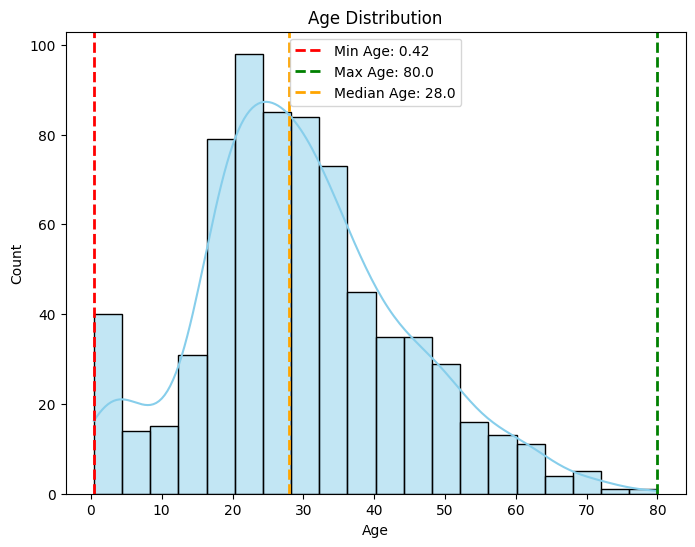

In [153]:
# Визуализация распределения по возрасту с помощью гистограммы
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Age'].dropna(), kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Добавление вертикальных линий для минимального, максимального и среднего возраста
min_age = dataset['Age'].min()
max_age = dataset['Age'].max()
median_age = dataset['Age'].median()

plt.axvline(min_age, color='red', linestyle='dashed', linewidth=2, label=f'Min Age: {min_age}')
plt.axvline(max_age, color='green', linestyle='dashed', linewidth=2, label=f'Max Age: {max_age}')
plt.axvline(median_age, color='orange', linestyle='dashed', linewidth=2, label=f'Median Age: {median_age}')

plt.legend()
plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


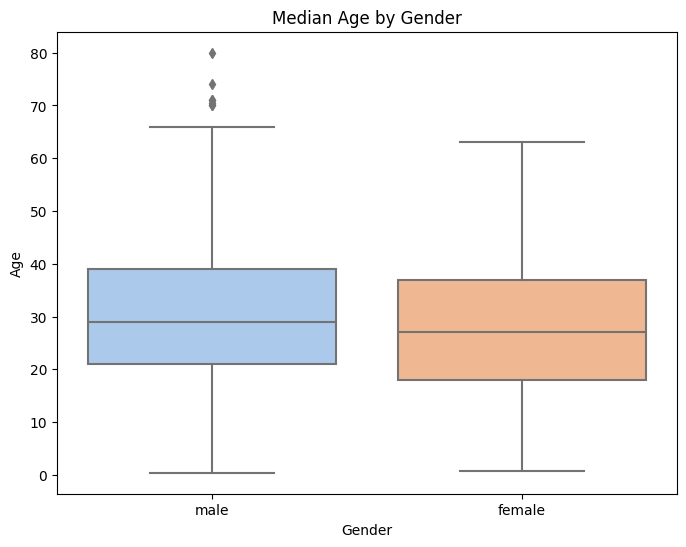

In [156]:
# Медианный возраст для мужчин и женщин
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Age', data=dataset, palette='pastel')
plt.title('Median Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')

plt.show()

**Answer:**

*Распределение возраста:* На гистограмме представлено общее распределение возраста пассажиров. Из неё следует, что молодые пассажиры преобладают на Титанике.

*Минимальный и максимальный возраст:* Пунктирные вертикальные линии на гистограмме обозначают минимальный, максимальный и медианный возраст. Минимальный возраст составляет около 0-1 года, медианный - около 28, а максимальный - около 80 лет.

*Медианный возраст в зависимости от пола:* Ящиковая диаграмма показывает медианный возраст отдельно для мужчин и женщин. Медианный возраст для мужчин оказывается немного выше, чем для женщин (Примерно 29 против 27).

**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot and is not middle name.

In [189]:
# Получаем титулы из столбца 'Name' и заносим в столбец 'Title'
dataset['Title'] = dataset['Name'].str.extract(r'\w*,\s([^\.]+)', expand=False)

# Находим длину массива уникальных значений в столбце 'Title'
unique_titles_count = len(dataset['Title'].unique())
print(f'Number of unique titles: {unique_titles_count}\n')

# Находим количества уникальных значений в столбце 'Title'
title_counts = dataset['Title'].value_counts()
print(f'Number of passengers of {title_counts}\n')

# Находим самые распространённые значения в столбце 'Title' по столбцу 'Sex'
man_title = dataset[dataset['Sex'] == 'male']['Title'].mode().values[0]
woman_title = dataset[dataset['Sex'] == 'female']['Title'].mode().values[0]

print(f'Most popular man\'s title: {man_title}')
print(f'Most popular woman\'s title: {woman_title}')

Number of unique titles: 17

Number of passengers of Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

Most popular man's title: Mr
Most popular woman's title: Miss


**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each class and visualize price distribution for each class as well. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). Main point here is to **choose** plots wisely and **make meaningful conclusions**



In [192]:
cor = dataset['Pclass'].corr(dataset['Fare'])
print(f'Correlation between pclass and fare = {cor}')

Correlation between pclass and fare = -0.5494996199439082


**Answer:** Корреляция между Pclass и Fare = -0.55%. Т.е. чем меньше значение класса пассажира, тем дороже стоит для него билет.

Average ticket fare by Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


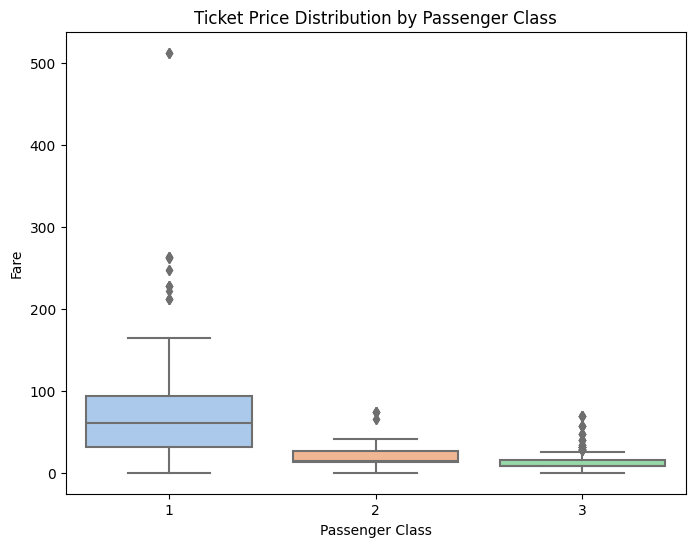

In [200]:
# Получаем среднее арифметическое по столбцу 'Fare' для сгрупированных по 'Pclass' значений
average_fare_by_class = dataset.groupby('Pclass')['Fare'].mean()
print(f'Average ticket fare by {average_fare_by_class}')

# Визуализация распределения цен для каждого класса с использованием box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=dataset, palette='pastel')
plt.title('Ticket Price Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

**Answer:** Из визуализации видно, что билеты первого класса имеют гораздо более широкий диапазон цен по сравнению с билетами второго и третьего классов. Кроме того, в первом классе есть выбросы, что указывает на значительный разброс цен внутри этого класса. Цены на билеты второго класса имеют более узкий диапазон, но практически не имеют выбросов. Цены на билеты третьего класса, хотя и имеют более узкий диапазон даже по сравнению со вторым классом, всё же показывают заметную вариабельность.

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

In [217]:
embarked_fare = dataset[["Embarked", "Fare"]].dropna()
cor = np.corrcoef(embarked_fare["Fare"], pd.factorize(embarked_fare["Embarked"])[0])
print(f'Correlation between embarked and fare =\n{cor}')

Correlation between embarked and fare =
[[1.         0.06346234]
 [0.06346234 1.        ]]


**Answer:** Корреляция между Embarked и Fare очень мала. Т.е. цена на билет практически не зависит от порта отправления.

Average ticket fare by port of Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


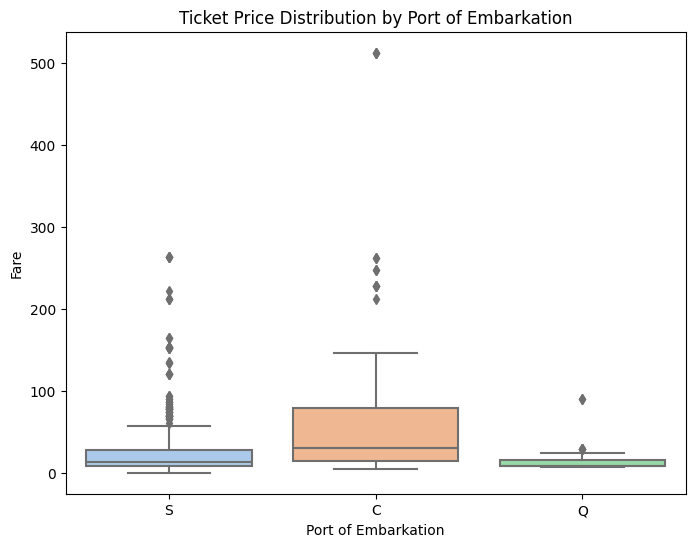

In [218]:
# Получаем среднее арифметическое по столбцу 'Fare' для сгрупированных по 'Embarked' значений
average_fare_by_embarked = dataset.groupby('Embarked')['Fare'].mean()
print(f'Average ticket fare by port of {average_fare_by_embarked}')

# Визуализация распределения цен для каждого порта с использованием box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Embarked', y='Fare', data=dataset, palette='pastel')
plt.title('Ticket Price Distribution by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Fare')
plt.show()

**Answer:** Из визуализации видно, что цены на билеты из Cherbourg находятся в наиболее широком диапазоне значений, а также, исходя из заметных выбросов, имеют значительный разброс. Диапазоны цен на билеты из Queenstown и Southampton гораздо меньше (больший у Southampton). При этом они также имеют заметный разброс (больший у Southampton).

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


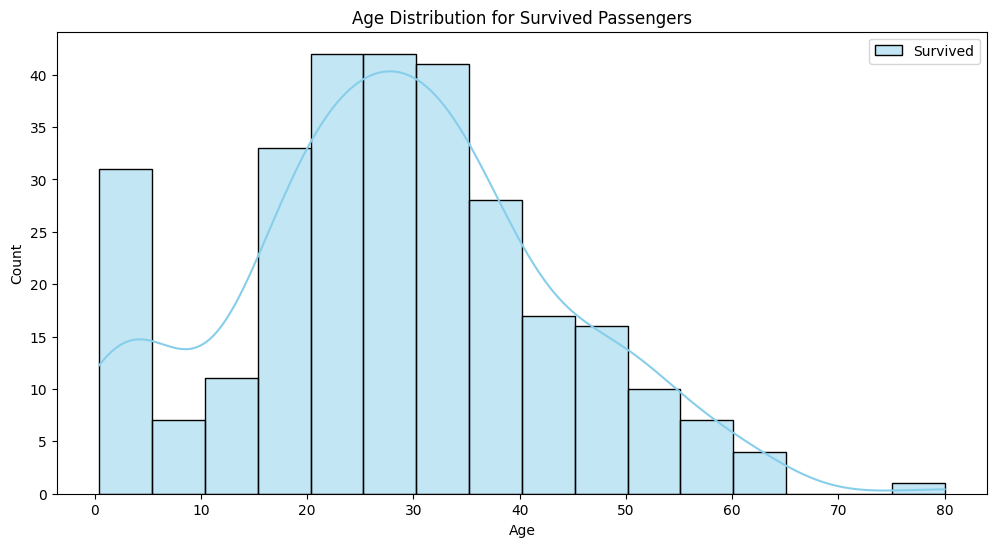

In [223]:
# Визуализация распределения возрастов для выживших
plt.figure(figsize=(12, 6))
sns.histplot(dataset[dataset['Survived'] == 1]['Age'].dropna(), kde=True, label='Survived', color='skyblue')
plt.title('Age Distribution for Survived Passengers')
plt.xlabel('Age')
plt.legend()
plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


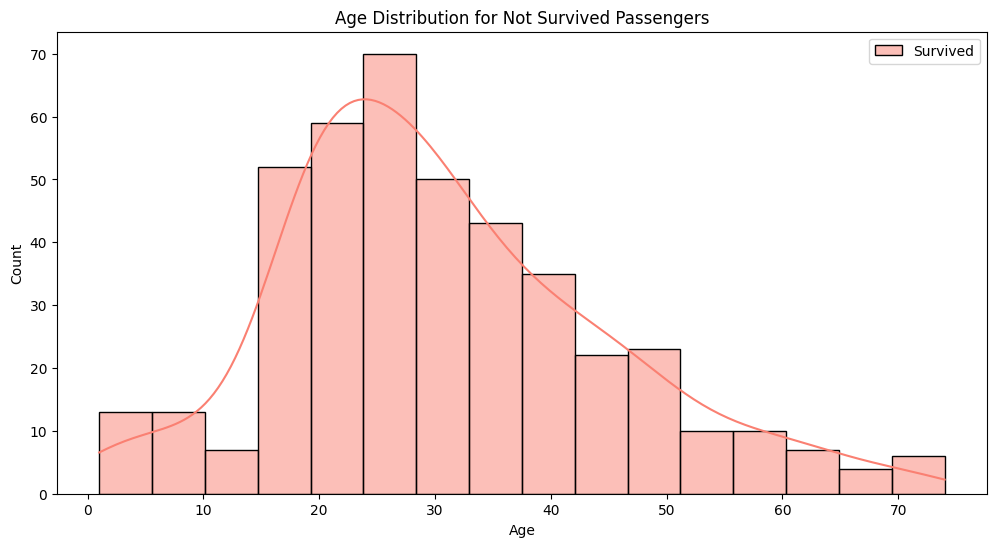

In [235]:
# Визуализация распределения возрастов для не выживших
plt.figure(figsize=(12, 6))
sns.histplot(dataset[dataset['Survived'] == 0]['Age'].dropna(), kde=True, label='Survived', color='salmon')
plt.title('Age Distribution for Not Survived Passengers')
plt.xlabel('Age')
plt.legend()
plt.show()

In [226]:
# Получаем среднее арифметическое по столбцу 'Age' по столбцу 'Survived'
mean_age_survived = dataset[dataset['Survived'] == 1]['Age'].mean()
mean_age_not_survived = dataset[dataset['Survived'] == 0]['Age'].mean()
print(f'Mean age for survived passengers: {mean_age_survived:.5f} years')
print(f'Mean age for not survived passengers: {mean_age_not_survived:.5f} years')

Mean age for survived passengers: 28.34369 years
Mean age for not survived passengers: 30.62618 years


**Answer:** Из визуализаций видно, что в среднем распределения по возрасту для выживших и не выживших практически одинаковые. 
Однако, маленьких детей 0-5 лет выжило в соотношении гораздо больше, чем погибло. Напротив, старых пассажиров 60-80 лет в соотношении погибло больше, чем выжило.

Средний возраст выживших и погибших также практически одинаков, хотя погибшие в среднем несколько старше выживших, что подкрепляет мои предыдущие слова.

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


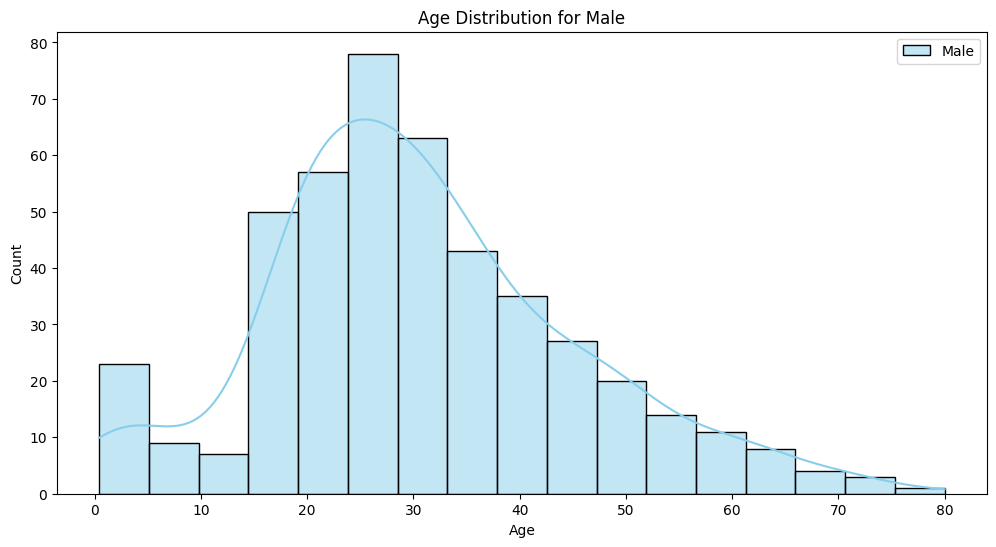

In [231]:
# Визуализация распределения возрастов для мужчин
plt.figure(figsize=(12, 6))
sns.histplot(dataset[dataset['Sex'] == 'male']['Age'].dropna(), kde=True, label='Male', color='skyblue')
plt.title('Age Distribution for Male')
plt.xlabel('Age')
plt.legend()
plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


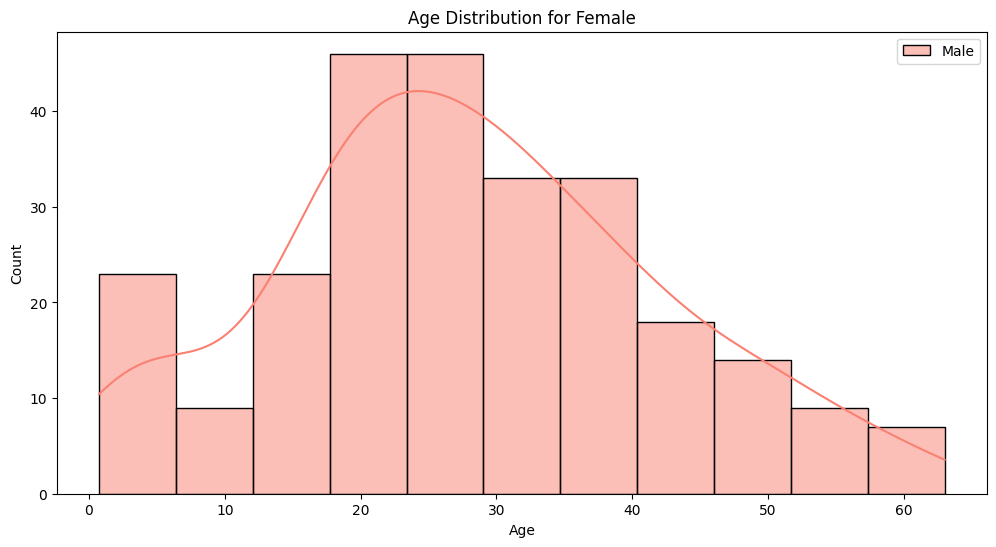

In [234]:
# Визуализация распределения возрастов для женщин
plt.figure(figsize=(12, 6))
sns.histplot(dataset[dataset['Sex'] == 'female']['Age'].dropna(), kde=True, label='Male', color='salmon')
plt.title('Age Distribution for Female')
plt.xlabel('Age')
plt.legend()
plt.show()

In [228]:
# Получаем среднее арифметическое по столбцу 'Age' по столбцу 'Sex'
mean_age_male = dataset[dataset['Sex'] == 'male']['Age'].mean()
mean_age_female = dataset[dataset['Sex'] == 'female']['Age'].mean()
print(f'Mean age for male passengers: {mean_age_male:.5f} years')
print(f'Mean age for female passengers: {mean_age_female:.5f} years')

Mean age for male passengers: 30.72664 years
Mean age for female passengers: 27.91571 years


**Answer:** Из визуализаций видно, что в среднем распределения по возрасту для мужчин и женщин похожи. Однако, женщин старше 65 лет на корабле не было вообще, в то время как некоторое количество мужчин 65-80 лет было. Также, в соотношении, количество женщин от 20 до 40 лет лишь слабо снижается, а количество мужчин сначало растёт, достигая пика на отметке около 25 лет, после чего быстро снижается.

Средний возраст мужчин и женщин также практически одинаков, хотя мужчины в среднем несколько старше женщин, что подкрепляет мои предыдущие слова.